# ImageClassfication_BotanicalResearch




### DOMAIN: 
Botanical research
### CONTEXT: 
University X is currently undergoing some research involving understanding the characteristics of 
flowers. They already have have invested on curating sample images. They require an automation which can 
create a classifier capable of determining a flower’s species from a photo
### DATA DESCRIPTION: 
The dataset comprises of images from 17 plant species. It can be downloaded from TensorFlow [ Hint: import tflearn.datasets.oxflower17 as oxflower17 ]
### PROJECT OBJECTIVE: 
Company’s management requires an automation which can create a classifier capable of 
determining a flower’s species from a photo


## Legend

 ### Insights/inferences/results have been displayed post each step

In [216]:
# Lets check if we are connected to GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


## 1.0 EDA/Pre-processing 

### 1.1 Import necessary libraries

In [217]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import statistics as stats
sns.set(color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Last import allows multiple outputs from one cell
import warnings
# Initialize the random number generator
import random
random.seed(0)

In [218]:
# Useful Configuration/Setting

# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

#Setting to shows all entries in array displayed
np.set_printoptions(threshold=sys.maxsize)

### 1.2 Read Data ,View Dimensions & Visualize

In [219]:
pip install tflearn

In [279]:
# Read The Data Set
import tflearn.datasets.oxflower17 as DS_Oxflower17

(X,Y) = DS_Oxflower17.load_data()



In [221]:
# Shape Of the DS

X.shape
Y.shape

(1360, 224, 224, 3)

(1360,)

Data Has a total of 1360 Images                                                           
Each image is of size 224 * 224                                    
Each iamge has 3 channels                                         
Corresponding label of each image is provided

<Figure size 720x720 with 0 Axes>

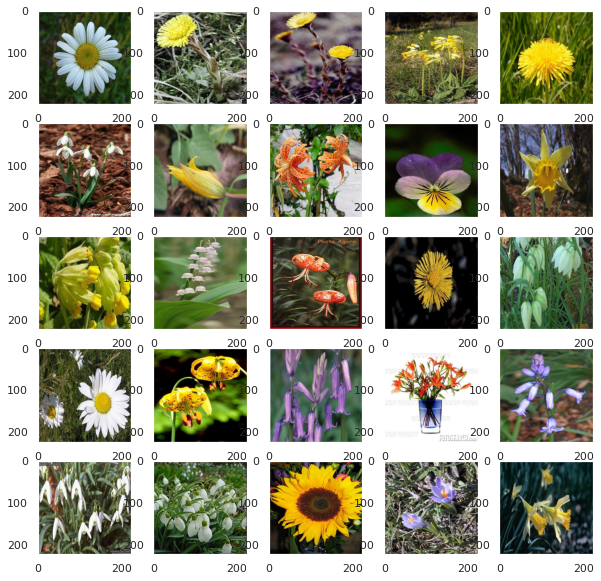

In [222]:
# Display Images

# Lets display the first 20 images 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10)) # plot 25 images
for i in range(25):
    plt.subplot(5,5,i+1)
    #plt.xticks([])
    #plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    #plt.xlabel(train_labels[i])

In [223]:
# Display Labels

## Lets display first 25 labels 
print("Labels of first 25 images")
for i in range(0,25,1):
  print(Y[i])

Labels of first 25 images
2
3
3
5
4
1
14
13
8
0
5
9
13
3
15
2
13
10
13
10
1
1
16
11
0


In [224]:
# Quick check on unique labels
np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

Labels of first 25 images were displayed                           
Total no of unique labels were found to be 0 to 16 , total number of 17 labels

<Figure size 720x720 with 0 Axes>

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '4')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '14')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '13')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '8')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '0')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '5')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '9')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '13')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '3')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '15')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '13')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '10')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '13')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '10')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '16')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '11')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '0')

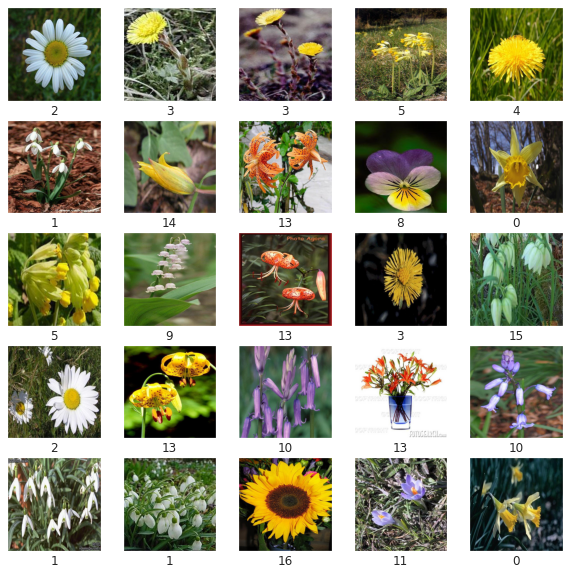

In [225]:
# Display Images Vs Labels

## Displaying Imges Vs Labels for first 25 images

plt.figure(figsize=(10,10)) # plot 25 images
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(Y[i])

<Figure size 720x720 with 0 Axes>

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'Original Image')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'Blur Filter')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, 'Edge Detection Filter')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, 'Sharpening Filter')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, 'emossing  Filter')

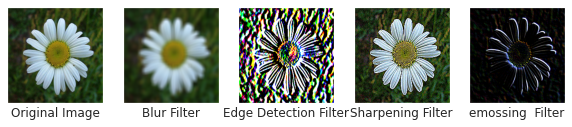

In [226]:
##  Apply Different filters 

import cv2

# Lets take 1 image as an example  and apply 5 different filters on them


plt.figure(figsize=(10,10))
plt.subplot(1,5,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(X[0])
plt.xlabel("Original Image")


plt.subplot(1,5,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(cv2.blur(X[0],(10,10)))
plt.xlabel('Blur Filter')

plt.subplot(1,5,3)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(cv2.Sobel(X[0],cv2.CV_64F,1,0,ksize=5))
plt.xlabel('Edge Detection Filter')


plt.subplot(1,5,4)
plt.xticks([])
plt.yticks([])
plt.grid(False)
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
plt.imshow(cv2.filter2D(X[0], -1, kernel))
plt.xlabel('Sharpening Filter')


plt.subplot(1,5,5)
plt.xticks([])
plt.yticks([])
plt.grid(False)
kernel = np.array([[0,-1,-1],[1,0,-1], [1,1,0]])
plt.imshow(cv2.filter2D(X[0], -1, kernel))
plt.xlabel('emossing  Filter')



<Figure size 720x720 with 0 Axes>

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'Original Image')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, 'Blur Filter')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, 'Edge Detection Filter')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, 'Sharpening Filter')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, 'emossing  Filter')

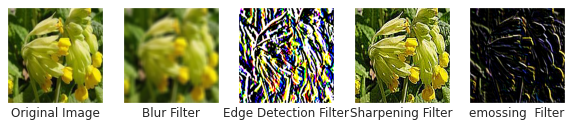

In [227]:
##  Apply Different filters 


# Lets take  another image as an example  and apply 5 different filters on them


plt.figure(figsize=(10,10))
plt.subplot(1,5,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(X[10])
plt.xlabel("Original Image")


plt.subplot(1,5,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(cv2.blur(X[10],(10,10)))
plt.xlabel('Blur Filter')

plt.subplot(1,5,3)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(cv2.Sobel(X[10],cv2.CV_64F,1,0,ksize=5))
plt.xlabel('Edge Detection Filter')


plt.subplot(1,5,4)
plt.xticks([])
plt.yticks([])
plt.grid(False)
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
plt.imshow(cv2.filter2D(X[10], -1, kernel))
plt.xlabel('Sharpening Filter')


plt.subplot(1,5,5)
plt.xticks([])
plt.yticks([])
plt.grid(False)
kernel = np.array([[0,-1,-1],[1,0,-1], [1,1,0]])
plt.imshow(cv2.filter2D(X[10], -1, kernel))
plt.xlabel('emossing  Filter')



In [228]:
## Blank Space 

## Seperator

## Blank Space

### 1.3 Create Train and Validation DS & Visualize this data

In [229]:
# We have X an Y already
# Lets check the shape once more
X.shape
Y.shape

(1360, 224, 224, 3)

(1360,)

In [230]:
# Let us split into Train and Validation sets
from sklearn.model_selection import train_test_split

X_Train,X_Val,Y_Train,Y_Val=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=0)
print("X_Train.shape",X_Train.shape)
print("X_Val.shape",X_Val.shape)
print("Y_Train.shape",Y_Train.shape)
print("Y_Val.shape",Y_Val.shape)

X_Train.shape (952, 224, 224, 3)
X_Val.shape (408, 224, 224, 3)
Y_Train.shape (952,)
Y_Val.shape (408,)


**Inference**                                                  
We have split our data set into Train and Validation


### 1.4 Check Whether Data Is Balanced

In [231]:

temp=pd.DataFrame(Y)
temp[0].value_counts()
# Balancing was mainatained while creating data splits as well

16    80
7     80
1     80
2     80
3     80
4     80
5     80
6     80
8     80
15    80
9     80
10    80
11    80
12    80
13    80
14    80
0     80
Name: 0, dtype: int64

**Inference**                                                   
Data is Balanced     

In [232]:
## Blank Space 

# Lets proceed with model building

## Blank Space

### 1.5 Data Preprocessing

In [233]:
# Save an OG Copy of the data

OG_X_Train=X_Train.copy()
OG_X_Val=X_Val.copy()
OG_Y_Train=Y_Train.copy()
OG_Y_Val=Y_Val.copy()


In [109]:
# Scale The Data
# This is done as a common step as can be used for NN,CNN and even ML algo
# Not necessarily required for ML algo's because its in the same scale, wont hurt but 

X_Train = X_Train.astype('float32')
X_Val = X_Val.astype('float32')

X_Train /= 255
X_Val /= 255
# For some reason , the original pixels were already normalized
# So in this case , scaling was not required 
# Make it a point to check original pixel values
# Scaling another time wont hurt but is not required here in this case

In [74]:
# Save a copy of X_Train and X_Val with originial dimensions
# In case we need it later 
Original_X_Train=X_Train.copy()
Original_X_Val=X_Val.copy()
Original_Y_Train=Y_Train.copy()
Original_Y_Val=Y_Val.copy()


In [75]:
# Lets us Resize X to 64 * 64 from 224 * 224


# Create a resized dataset for training and testing inputs with corresponding size
# Here we are resizing it to 28X28 (same input size as MNIST)
X_Train_resized = np.zeros((X_Train.shape[0], 64, 64,3))
for i in range(X_Train.shape[0]):
  #using cv2.resize to resize each train example to 28X28 size using Cubic interpolation
  X_Train_resized[i,:,:] = cv2.resize(X_Train[i], dsize=(64, 64), interpolation=cv2.INTER_CUBIC)

X_Val_resized = np.zeros((X_Val.shape[0], 64, 64,3))
for i in range(X_Val.shape[0]):
  #using cv2.resize to resize each test example to 28X28 size using Cubic interpolation
  X_Val_resized[i,:,:] = cv2.resize(X_Val[i], dsize=(64, 64), interpolation=cv2.INTER_CUBIC)


# Take a copy of resized data into original
X_Train=X_Train_resized.copy()
X_Val=X_Val_resized.copy()
del(X_Train_resized, X_Val_resized)

print("X_Train.shape",X_Train.shape)
print("X_Val.shape",X_Val.shape)
print("Y_Train.shape",Y_Train.shape)
print("Y_Val.shape",Y_Val.shape)


X_Train.shape (952, 64, 64, 3)
X_Val.shape (408, 64, 64, 3)
Y_Train.shape (952,)
Y_Val.shape (408,)


In [234]:
# Convert Y to One hot vectors 
from tensorflow.keras.utils import to_categorical

Y_Train = to_categorical(Y_Train, num_classes=17)
Y_Val = to_categorical(Y_Val, num_classes=17)

print("Y_Train.shape",Y_Train.shape)
print("Y_Val.shape",Y_Val.shape)

Y_Train.shape (952, 17)
Y_Val.shape (408, 17)


In [111]:
# Lets define some variables we will be using through model building

# Lets set some commonly used variables

batch_size=95 # Roughly divided into 10 batches.
image_size=64 

Inferrence
Data is pre-processed , ready for model building

## 2.0 Model Building 
We will be building models on this dataset with                                   
(1)CNN                                                                           
(2)Neural Networks                                                                
(3)Suprvised Learning Algorithms                                                                                                                            

We will be comparing performance on this image DS with all 3.                                                                  
We would need to feed the same training data to all algorithms if comparisons need to be done i.e If we are using augmented data then augmented data would need to bed fed to all algorithms

In [ ]:
## Lets build a DS to store results of each model
ResultsDF=pd.DataFrame(columns=['Model_Type','Train_Acc','Val_Acc'])
ResultsDF

,Model_Type,Train_Acc,Val_Acc


## 2.1 Model Building with CNN

We will be bulding a CNN model for this DS                    Details of the CNN model that will be built 

1. Conv2D (64, 128 filters)
2. MaxPool2D
3. GlobalMaxPool2D
4. Batch Normalization
5. Flatten
6. Dropout
7. Dense

Input size: 64 x 64 x 3 (size x colors)

Pool size: 2 x 2 (for MaxPool2D)

Kernel size: 3 x 3 (for Conv2D)

In [ ]:
# All Imports required for CNN
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D,BatchNormalization,Flatten,Activation,Dense,GlobalMaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
# Build the model

# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(image_size, image_size, 3)))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Normalization layer
# The layer normalizes its output using the mean and standard deviation of the current batch of inputs.
model.add(BatchNormalization())

#### Repeat 

# Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Normalization layer
# The layer normalizes its output using the mean and standard deviation of the current batch of inputs.
model.add(BatchNormalization())

#### Repeat 

# Add a Convolutional Layer with 128 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Normalization layer
# The layer normalizes its output using the mean and standard deviation of the current batch of inputs.
model.add(BatchNormalization())

#### Repeat 

# Add a Convolutional Layer with 128 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Global Max Pool layer
model.add(GlobalMaxPool2D())

## Adding dense layers

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu"))

# Adding dropout
model.add(Dropout(0.2))

# Add Fully Connected Layer with 64 units and activation function as 'relu'
model.add(Dense(64, activation="relu"))

# Normalization layer
# The layer normalizes its output using the mean and standard deviation of the current batch of inputs.
model.add(BatchNormalization())

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(17, activation="softmax"))

# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
# Use best model checkpoint
#callback = EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)
# If val accuracy does not increase by 0.01 in 2 epochs , stop
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Fit the model
historyRegressorModel=model.fit(x=X_Train, y=Y_Train, batch_size=batch_size, epochs=400,validation_data=(X_Val,Y_Val), callbacks=[mc])

Train on 952 samples, validate on 408 samples
Epoch 1/400
952/952 [==============================] - ETA: 0s - loss: 2.7730 - acc: 0.1492
Epoch 00001: val_acc improved from -inf to 0.05882, saving model to best_model.h5
952/952 [==============================] - 16s 17ms/sample - loss: 2.7730 - acc: 0.1492 - val_loss: 2.8366 - val_acc: 0.0588
Epoch 2/400
855/952 [=========================>....] - ETA: 0s - loss: 2.0938 - acc: 0.3427
Epoch 00002: val_acc did not improve from 0.05882
952/952 [==============================] - 0s 214us/sample - loss: 2.0835 - acc: 0.3477 - val_loss: 2.8458 - val_acc: 0.0588
Epoch 3/400
855/952 [=========================>....] - ETA: 0s - loss: 1.8724 - acc: 0.4047
Epoch 00003: val_acc did not improve from 0.05882
952/952 [==============================] - 0s 213us/sample - loss: 1.8731 - acc: 0.4044 - val_loss: 2.8605 - val_acc: 0.0588
Epoch 4/400
952/952 [==============================] - ETA: 0s - loss: 1.7987 - acc: 0.4149
Epoch 00004: val_acc did not 

In [ ]:
######  Evaluate Model On Validation Data #####
## Cross check best score
best_train_score = max(historyRegressorModel.history['acc'])
best_val_score = max(historyRegressorModel.history['val_acc'])
print(best_train_score,best_val_score)

0.6985294 0.60539216


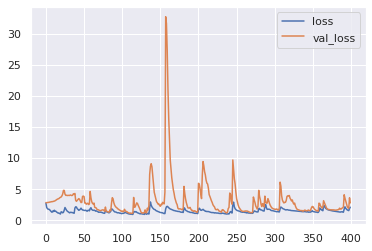

In [ ]:
## Plot Train Vs Validation ##
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(historyRegressorModel.history['loss'], label='loss')
plt.plot(historyRegressorModel.history['val_loss'], label='val_loss')
plt.legend()

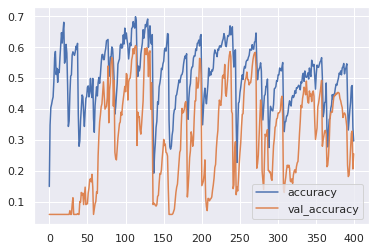

In [ ]:
# Plot accuracy per iteration
plt.plot(historyRegressorModel.history['acc'], label='accuracy')
plt.plot(historyRegressorModel.history['val_acc'], label='val_accuracy')
plt.legend()

In [ ]:
# Get the  model with the best score
# Lets  save both model and weights in appropriate file names

saved_model = load_model('best_model.h5')
model = saved_model
model.save('/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/FinalCNNModel.h5')
model.save_weights('/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/FinalCNNModelWeights.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
# Lets check if our model and weights are saved 
!ls

17flowers  best_model.h5  drive  sample_data


In [ ]:
# Lets get the saved model
model = load_model('/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/FinalCNNModel.h5')

In [ ]:
# Lets get the Train and Val Scores 
# Log results in Data Frame
(train_loss,train_acc)=model.evaluate(X_Train,Y_Train)
(val_loss,val_acc)=model.evaluate(X_Val,Y_Val)
# Capturing best results from above epoch
ResultsDF=ResultsDF.append({ 'Model_Type' :"CNN",'Train_Acc':train_acc,'Val_Acc':val_acc,},ignore_index=True)
ResultsDF

,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922


In [ ]:
ResultsDF.to_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")

In [ ]:
ResultsDF=pd.read_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")
ResultsDF

,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922


## 2.2 Model Building with NN

We will be bulding a NN model for this DS                    Details of the NN model that will be built 

1.Flatten                                                      
2.Dense layers with activations Relu                           
3.Dropout


Input size: 64 x 64 x 3                                        
This data will be flattened to  a input 12288 flat vector


In [ ]:
# All Imports required for NN
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dropout,Flatten,Activation,Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
# Build the model

# Initializing the model
model = Sequential()

model.add(Flatten(input_shape=(64, 64, 3)))
model.add(Dense(units=6150,kernel_initializer='he_normal'))
model.add(Activation('relu'))  
model.add(Dropout(0.2))
model.add(Dense(units=6150,kernel_initializer='he_normal')) 
model.add(Activation('relu'))  
model.add(Dropout(0.2))
model.add(Dense(units=6150,kernel_initializer='he_normal'))
model.add(Activation('relu'))  
model.add(Dropout(0.2))
model.add(Dense(units=17,activation='softmax',kernel_initializer='he_normal'))

# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
# Use best model checkpoint
#callback = EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)
# If val accuracy does not increase by 0.01 in 2 epochs , stop
mc = ModelCheckpoint('best_model_NN.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Fit the model
historyRegressorModel=model.fit(x=X_Train, y=Y_Train, batch_size=batch_size, epochs=50,validation_data=(X_Val,Y_Val), callbacks=[mc])

Train on 952 samples, validate on 408 samples
Epoch 1/50
855/952 [=========================>....] - ETA: 0s - loss: 2.8428 - acc: 0.0807
Epoch 00001: val_acc improved from -inf to 0.13725, saving model to best_model_NN.h5
952/952 [==============================] - 7s 7ms/sample - loss: 2.8327 - acc: 0.0872 - val_loss: 2.6046 - val_acc: 0.1373
Epoch 2/50
855/952 [=========================>....] - ETA: 0s - loss: 2.4425 - acc: 0.1474
Epoch 00002: val_acc improved from 0.13725 to 0.18382, saving model to best_model_NN.h5
952/952 [==============================] - 19s 20ms/sample - loss: 2.4316 - acc: 0.1523 - val_loss: 2.6247 - val_acc: 0.1838
Epoch 3/50
855/952 [=========================>....] - ETA: 0s - loss: 2.3423 - acc: 0.1825
Epoch 00003: val_acc improved from 0.18382 to 0.22794, saving model to best_model_NN.h5
952/952 [==============================] - 24s 25ms/sample - loss: 2.3297 - acc: 0.1891 - val_loss: 2.2011 - val_acc: 0.2279
Epoch 4/50
855/952 [=========================>.

In [ ]:
######  Evaluate Model On Validation Data #####
## Cross check best score
best_train_score = max(historyRegressorModel.history['acc'])
best_val_score = max(historyRegressorModel.history['val_acc'])
print(best_train_score,best_val_score)

0.7478992 0.46813726


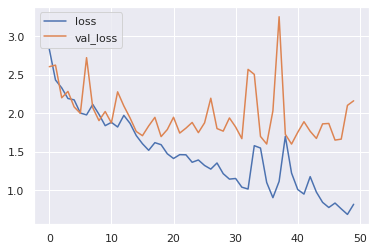

In [ ]:
## Plot Train Vs Validation ##
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(historyRegressorModel.history['loss'], label='loss')
plt.plot(historyRegressorModel.history['val_loss'], label='val_loss')
plt.legend()

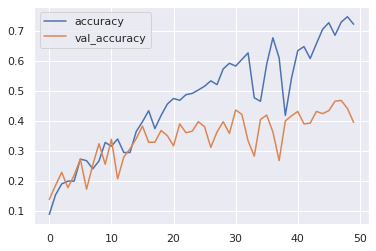

In [ ]:
# Plot accuracy per iteration
plt.plot(historyRegressorModel.history['acc'], label='accuracy')
plt.plot(historyRegressorModel.history['val_acc'], label='val_accuracy')
plt.legend()

In [ ]:
# Get the  model with the best score
# Lets  save both model and weights in appropriate file names

saved_model = load_model('best_model_NN.h5')
model = saved_model
model.save('/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/FinalNNModel.h5')
model.save_weights('/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/FinalNNModelWeights.h5')

In [ ]:
# Lets check if our model and weights are saved 
!ls

17flowers  best_model.h5  best_model_NN.h5  drive  sample_data


In [ ]:
# Lets get the saved model
model = load_model('/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/FinalNNModel.h5')

In [ ]:
# Lets check if our model and weights are saved 
!ls

17flowers  best_model.h5  best_model_NN.h5  drive  sample_data


In [ ]:
# Lets get the Train and Val Scores 
# Log results in Data Frame
(train_loss,train_acc)=model.evaluate(X_Train,Y_Train)
(val_loss,val_acc)=model.evaluate(X_Val,Y_Val)
# Capturing best results from above epoch
ResultsDF=ResultsDF.append({ 'Model_Type' :"NN",'Train_Acc':train_acc,'Val_Acc':val_acc,},ignore_index=True)
ResultsDF

,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922
1,NN,0.7741597,0.4681373


In [ ]:
ResultsDF.to_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")

In [ ]:
ResultsDF=pd.read_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")
ResultsDF

,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922
1,NN,0.7741597,0.4681373


## 2.3 Model Building with Supervised Learning Algorithms

In [ ]:
# Prepare Data
# Training data and validation data remains same as used above
# Need to convert this to appropiate format for ML algorithms

In [ ]:
## Prepare data for supervised learning algorithms
## Data needs to be in the form of data frames 
## Each Image should be 1 ROW in DF 

#Initialise Data Frames
X_Train_ML= pd.DataFrame( )
Y_Train_ML=pd.DataFrame(Original_Y_Train)
X_Val_ML=pd.DataFrame( ) # This is validation data
Y_Val_ML=pd.DataFrame(Original_Y_Val) # This is validation data


In [ ]:
# Quick resheck on dimensions

X_Train.shape
Y_Train_ML.shape
X_Val.shape
Y_Val_ML.shape

#We are good to proceed

(952, 64, 64, 3)

(952, 1)

(408, 64, 64, 3)

(408, 1)

In [ ]:
# Convert TRAIN data from "TENSOR" to DataFrame

#Outer loop to loop over 
for i in range(0,X_Train.shape[0],1):
    X_Train_ML[i]=X_Train[i].flatten()

In [ ]:
# Here we are taking tranpose 
# Each image should be one row in DF
X_Train_ML=X_Train_ML.T 

In [ ]:
X_Train_ML.shape
Y_Train_ML.shape

# Training Data is prepared

(952, 12288)

(952, 1)

In [ ]:
# Convert VALIDATION  data from "TENSOR" to DataFrame

#Outer loop to loop over 
for i in range(0,X_Val.shape[0],1):
    X_Val_ML[i]=X_Val[i].flatten()

In [ ]:
# Here we are taking tranpose 
# Each image should be one row in DF
X_Val_ML=X_Val_ML.T 

In [ ]:
X_Val_ML.shape
Y_Val_ML.shape

# Validation data is prepared 

(408, 12288)

(408, 1)

Data is Prepared in the form of Dataframes , same will be used for ALL Supervised Learning algos                                                             
Eachimage has been flattened into one row in the DF

In [ ]:
## Blank Space


## Blank Space

In [ ]:
## Apply Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=1)
#Train/Fit Data set
model=model.fit(X_Train_ML,Y_Train_ML)

In [ ]:
# Lets get the Train and Val Scores 
# Log results in Data Frame
train_acc=model.score(X_Train_ML,Y_Train_ML)
val_acc=model.score(X_Val_ML,Y_Val_ML)

# Lets Print them
print("Score on Training data is = ",train_acc)
#Check score on testing data
print("Score on Validation data is = " ,val_acc)

# Capturing best results from above epoch
ResultsDF=ResultsDF.append({ 'Model_Type' :"Logistic Regression",'Train_Acc':train_acc,'Val_Acc':val_acc,},ignore_index=True)
ResultsDF

Score on Training data is =  0.4065126050420168
Score on Validation data is =  0.3235294117647059


,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922
1,NN,0.7741597,0.4681373
2,Logistic Regression,0.4065126,0.3235294


In [ ]:
ResultsDF.to_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")

In [ ]:
ResultsDF=pd.read_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")
ResultsDF

,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922
1,NN,0.7741597,0.4681373
2,Logistic Regression,0.4065126,0.3235294


In [ ]:
# Blank Space

# Blank Space

In [ ]:
## Apply KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
#Train/Fit Data set
model=model.fit(X_Train_ML,Y_Train_ML)

In [ ]:
# Lets get the Train and Val Scores 
# Log results in Data Frame
train_acc=model.score(X_Train_ML,Y_Train_ML)
val_acc=model.score(X_Val_ML,Y_Val_ML)

# Lets Print them
print("Score on Training data is = ",train_acc)
#Check score on testing data
print("Score on Validation data is = " ,val_acc)

# Capturing best results from above epoch
ResultsDF=ResultsDF.append({ 'Model_Type' :"KNN",'Train_Acc':train_acc,'Val_Acc':val_acc,},ignore_index=True)
ResultsDF

Score on Training data is =  0.5619747899159664
Score on Validation data is =  0.2965686274509804


,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922
1,NN,0.7741597,0.4681373
2,Logistic Regression,0.4065126,0.3235294
3,KNN,0.5619748,0.2965686


In [ ]:
ResultsDF.to_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")

In [ ]:
ResultsDF=pd.read_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")
ResultsDF

,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922
1,NN,0.7741597,0.4681373
2,Logistic Regression,0.4065126,0.3235294
3,KNN,0.5619748,0.2965686


In [ ]:
# Blank Space

# Blank Space

In [ ]:
## Apply SVM

In [ ]:
from sklearn.svm import SVC
model=SVC(random_state=1)
#Train/Fit Data set
model=model.fit(X_Train_ML,Y_Train_ML)

In [ ]:
# Lets get the Train and Val Scores 
# Log results in Data Frame
train_acc=model.score(X_Train_ML,Y_Train_ML)
val_acc=model.score(X_Val_ML,Y_Val_ML)

# Lets Print them
print("Score on Training data is = ",train_acc)
#Check score on testing data
print("Score on Validation data is = " ,val_acc)

# Capturing best results from above epoch
ResultsDF=ResultsDF.append({ 'Model_Type' :"SVM",'Train_Acc':train_acc,'Val_Acc':val_acc,},ignore_index=True)
ResultsDF

Score on Training data is =  0.9201680672268907
Score on Validation data is =  0.4534313725490196


,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922
1,NN,0.7741597,0.4681373
2,Logistic Regression,0.4065126,0.3235294
3,KNN,0.5619748,0.2965686
4,SVM,0.9201681,0.4534314


In [ ]:
ResultsDF.to_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")

In [ ]:
ResultsDF=pd.read_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")
ResultsDF

,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922
1,NN,0.7741597,0.4681373
2,Logistic Regression,0.4065126,0.3235294
3,KNN,0.5619748,0.2965686
4,SVM,0.9201681,0.4534314


In [ ]:
# Blank Space

# Blank Space

In [ ]:
## Apply Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)

#Train/Fit Data set
model=model.fit(X_Train_ML,Y_Train_ML)

In [ ]:
# Lets get the Train and Val Scores 
# Log results in Data Frame
train_acc=model.score(X_Train_ML,Y_Train_ML)
val_acc=model.score(X_Val_ML,Y_Val_ML)

# Lets Print them
print("Score on Training data is = ",train_acc)
#Check score on testing data
print("Score on Validation data is = " ,val_acc)

# Capturing best results from above epoch
ResultsDF=ResultsDF.append({ 'Model_Type' :"Random Forest",'Train_Acc':train_acc,'Val_Acc':val_acc,},ignore_index=True)
ResultsDF

Score on Training data is =  1.0
Score on Validation data is =  0.44607843137254904


,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922
1,NN,0.7741597,0.4681373
2,Logistic Regression,0.4065126,0.3235294
3,KNN,0.5619748,0.2965686
4,SVM,0.9201681,0.4534314
5,Random Forest,1.0000000,0.4460784


In [ ]:
ResultsDF.to_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")

In [ ]:
ResultsDF=pd.read_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")
ResultsDF

,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922
1,NN,0.7741597,0.4681373
2,Logistic Regression,0.4065126,0.3235294
3,KNN,0.5619748,0.2965686
4,SVM,0.9201681,0.4534314
5,Random Forest,1.0000000,0.4460784


In [ ]:
# Blank Space

# Blank Space

In [ ]:
## Apply Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)

#Train/Fit Data set
model=model.fit(X_Train_ML,Y_Train_ML)

In [ ]:
# Lets get the Train and Val Scores 
# Log results in Data Frame
train_acc=model.score(X_Train_ML,Y_Train_ML)
val_acc=model.score(X_Val_ML,Y_Val_ML)

# Lets Print them
print("Score on Training data is = ",train_acc)
#Check score on testing data
print("Score on Validation data is = " ,val_acc)

# Capturing best results from above epoch
ResultsDF=ResultsDF.append({ 'Model_Type' :"Ada Boost",'Train_Acc':train_acc,'Val_Acc':val_acc,},ignore_index=True)
ResultsDF

Score on Training data is =  0.15861344537815125
Score on Validation data is =  0.13480392156862744


,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922
1,NN,0.7741597,0.4681373
2,Logistic Regression,0.4065126,0.3235294
3,KNN,0.5619748,0.2965686
4,SVM,0.9201681,0.4534314
5,Random Forest,1.0000000,0.4460784
6,Ada Boost,0.1586134,0.1348039


In [ ]:
ResultsDF.to_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")

In [ ]:
ResultsDF=pd.read_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")
ResultsDF

,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922
1,NN,0.7741597,0.4681373
2,Logistic Regression,0.4065126,0.3235294
3,KNN,0.5619748,0.2965686
4,SVM,0.9201681,0.4534314
5,Random Forest,1.0000000,0.4460784
6,Ada Boost,0.1586134,0.1348039


In [ ]:
# Blank Space

# Blank Space

In [ ]:
## Apply Gradient Boost

In [ ]:
# Check how much time this would take 
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=1)

#Train/Fit Data set
model=model.fit(X_Train_ML,Y_Train_ML)

In [ ]:
# Lets get the Train and Val Scores 
# Log results in Data Frame
train_acc=model.score(X_Train_ML,Y_Train_ML)
val_acc=model.score(X_Val_ML,Y_Val_ML)

# Lets Print them
print("Score on Training data is = ",train_acc)
#Check score on testing data
print("Score on Validation data is = " ,val_acc)

# Capturing best results from above epoch
ResultsDF=ResultsDF.append({ 'Model_Type' :"Gradient Boost",'Train_Acc':train_acc,'Val_Acc':val_acc,},ignore_index=True)
ResultsDF

Score on Training data is =  1.0
Score on Validation data is =  0.3602941176470588


,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922
1,NN,0.7741597,0.4681373
2,Logistic Regression,0.4065126,0.3235294
3,KNN,0.5619748,0.2965686
4,SVM,0.9201681,0.4534314
5,Random Forest,1.0000000,0.4460784
6,Ada Boost,0.1586134,0.1348039
7,Gradient Boost,1.0000000,0.3602941


In [ ]:
ResultsDF.to_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")

In [4]:
ResultsDF=pd.read_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")
ResultsDF

,Model_Type,Train_Acc,Val_Acc
0,CNN,0.701681,0.605392
1,NN,0.774160,0.468137
2,Logistic Regression,0.406513,0.323529
3,KNN,0.561975,0.296569
4,SVM,0.920168,0.453431
5,Random Forest,1.000000,0.446078
6,Ada Boost,0.158613,0.134804
7,Gradient Boost,1.000000,0.360294


In [ ]:
# Blank Space

# Blank Space

In [ ]:
## Blank Space 

## Blank Space

## 2.4 CNN With Transfer learning -VGG16 ImageNet
- Lets use CNN Pre-Trained VGG Net on ImageNet
- We will freeze all layers except classification/FC layer
- We will change the no of output neurons to 17
- We will now train this n/w i.e only from the FC part

In [281]:
# All Imports required for CNN Trasnfer Learning
from keras.applications.vgg16 import VGG16 ,preprocess_input
from keras import models
from keras import layers
from keras import optimizers
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.callbacks import ModelCheckpoint


In [282]:
# Pre-process data according to what VGG16 Requires
# Note to Self : Ideally Preprocessing from VGG16 should be used
# However in this case , 
vgg_X_Train=preprocess_input(OG_X_Train.copy()*255)
vgg_X_Val=preprocess_input(OG_X_Val.copy()*255)

# VGG Preprocessing expects input of pixels between 0-255
# Our pixels originally seem to already be normalized
# Therefore multiplyin with 255 otherwise there is no need do

vgg_X_Train.shape
vgg_X_Val.shape

(952, 224, 224, 3)

(408, 224, 224, 3)

In [283]:

#Load the VGG model
# Although VGG requires 224 *224 you can use any input size below
# Int his case , we have gone with 224*224
vgg_base = VGG16(weights='imagenet', include_top=False ,input_shape=(image_size, image_size, 3))
vgg_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [284]:
# Create the model
model = models.Sequential()

#Lets set all layers except what we have added as non trainable
for layer in vgg_base.layers:
    layer.trainable = False

# Add the vgg convolutional base model
for layer in vgg_base.layers:
        model.add(layer)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(17, activation='softmax'))



model.summary() 

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [285]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizers.RMSprop(lr=2e-4))

In [286]:
# Use best model checkpoint
#callback = EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)
# If val accuracy does not increase by 0.01 in 2 epochs , stop
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Fit the model
# Use the original 224*224 data here for XTrain and Xval
historyRegressorModel=model.fit(x=vgg_X_Train, y=Y_Train, batch_size=batch_size, epochs=50,validation_data=(vgg_X_Val,Y_Val), callbacks=[mc])

Train on 952 samples, validate on 408 samples
Epoch 1/50
950/952 [============================>.] - ETA: 0s - loss: 16.6997 - acc: 0.4632
Epoch 00001: val_acc improved from -inf to 0.75000, saving model to best_model.h5
952/952 [==============================] - 6s 6ms/sample - loss: 16.6654 - acc: 0.4632 - val_loss: 2.4639 - val_acc: 0.7500
Epoch 2/50
950/952 [============================>.] - ETA: 0s - loss: 0.8537 - acc: 0.9032
Epoch 00002: val_acc improved from 0.75000 to 0.84314, saving model to best_model.h5
952/952 [==============================] - 3s 3ms/sample - loss: 0.8519 - acc: 0.9034 - val_loss: 1.4358 - val_acc: 0.8431
Epoch 3/50
950/952 [============================>.] - ETA: 0s - loss: 0.3783 - acc: 0.9537
Epoch 00003: val_acc improved from 0.84314 to 0.84559, saving model to best_model.h5
952/952 [==============================] - 3s 3ms/sample - loss: 0.3775 - acc: 0.9538 - val_loss: 1.5197 - val_acc: 0.8456
Epoch 4/50
950/952 [============================>.] - ETA:

In [263]:
######  Evaluate Model On Validation Data #####
## Cross check best score
best_train_score = max(historyRegressorModel.history['acc'])
best_val_score = max(historyRegressorModel.history['val_acc'])
print(best_train_score,best_val_score)

1.0 0.87009805


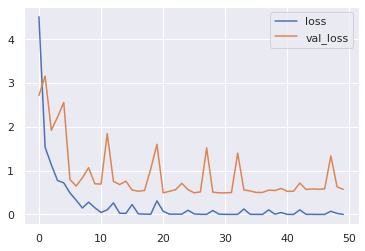

In [264]:
## Plot Train Vs Validation ##
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(historyRegressorModel.history['loss'], label='loss')
plt.plot(historyRegressorModel.history['val_loss'], label='val_loss')
plt.legend()

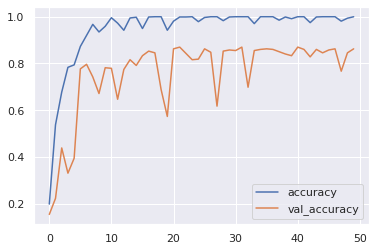

In [265]:
# Plot accuracy per iteration
plt.plot(historyRegressorModel.history['acc'], label='accuracy')
plt.plot(historyRegressorModel.history['val_acc'], label='val_accuracy')
plt.legend()

In [266]:
# Get the  model with the best score
# Lets  save both model and weights in appropriate file names

saved_model = load_model('best_model.h5')
model = saved_model
model.save('/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/CNN_TL_VGG16_IGNet.h5')
model.save_weights('/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/CNN_TL_VGG16_IGNet_weights.h5')

In [267]:
# Lets check if our model and weights are saved 
!ls

17flowers  best_model.h5  drive  sample_data


In [268]:
# Lets get the saved model
model = load_model('/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/CNN_TL_VGG16_IGNet.h5')

In [269]:
# Lets get the Train and Val Scores 
# Log results in Data Frame
(train_loss,train_acc)=model.evaluate(vgg_X_Train,Y_Train)
(val_loss,val_acc)=model.evaluate(vgg_X_Val,Y_Val)
# Capturing best results from above epoch
ResultsDF=ResultsDF.append({ 'Model_Type' :"CNN_TL_VGG16",'Train_Acc':train_acc,'Val_Acc':val_acc,},ignore_index=True)
ResultsDF

,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922
1,NN,0.7741597,0.4681373
2,Logistic Regression,0.4065126,0.3235294
3,KNN,0.5619748,0.2965686
4,SVM,0.9201681,0.4534314
5,Random Forest,1.0000000,0.4460784
6,Ada Boost,0.1586134,0.1348039
7,Gradient Boost,1.0000000,0.3602941
8,CNN_TL_VGG16,1.0000000,0.8700981


In [271]:
ResultsDF.to_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")

In [272]:
ResultsDF=pd.read_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")
ResultsDF

,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922
1,NN,0.7741597,0.4681373
2,Logistic Regression,0.4065126,0.3235294
3,KNN,0.5619748,0.2965686
4,SVM,0.9201681,0.4534314
5,Random Forest,1.0000000,0.4460784
6,Ada Boost,0.1586134,0.1348039
7,Gradient Boost,1.0000000,0.3602941
8,CNN_TL_VGG16,1.0000000,0.8700981


Note to Self  : You can also do Data Augmentation to data to try to improve accuracy. In this case you would use flow instead of flow from directory and the VGG16Preprocess part can be added inside the image generator


In [ ]:
# Blank Space

# Blank Space

## 2.5 CNN With Transfer learning -Resnet ImageNet
- Lets use CNN Pre-Trained Res Net on ImageNet
- We will freeze all layers except classification/FC layer
- We will change the no of output neurons to 17
- We will now train this n/w i.e only from the FC part

In [295]:
# All Imports required for CNN Trasnfer Learning
from keras.applications.resnet import ResNet50 ,preprocess_input
from keras import models
from keras import layers
from keras import optimizers
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.callbacks import ModelCheckpoint


In [296]:
# Pre-process data according to what VGG16 Requires
# Note to Self : Ideally Preprocessing from VGG16 should be used
# However in this case , 
resnet_X_Train=preprocess_input(OG_X_Train.copy()*255)
resnet_X_Val=preprocess_input(OG_X_Val.copy()*255)

# VGG Preprocessing expects input of pixels between 0-255
# Our pixels originally seem to already be normalized
# Therefore multiplyin with 255 otherwise there is no need do

resnet_X_Train.shape
resnet_X_Val.shape

(952, 224, 224, 3)

(408, 224, 224, 3)

In [297]:

#Load the resnet model

resnet_base = ResNet50(weights='imagenet', include_top=False ,input_shape=(image_size, image_size, 3))
resnet_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_17[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [300]:
# Create the model
model = models.Sequential()

#Lets set all layers except what we have added as non trainable
for layer in resnet_base.layers:
    layer.trainable = False

# Add the vgg convolutional base model ##Some reason this layer adding is not working, so doing alternately 
#for layer in resnet_base.layers:
#        model.add(layer)
 
model.add(resnet_base)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(17, activation='softmax'))



model.summary() 

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_13 (Flatten)         (None, 100352)            0         
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              102761472 
_________________________________________________________________
dropout_12 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 17)                17425     
Total params: 126,366,609
Trainable params: 102,778,897
Non-trainable params: 23,587,712
_________________________________________________________________


In [301]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizers.RMSprop(lr=2e-4))

In [303]:
# Use best model checkpoint
#callback = EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)
# If val accuracy does not increase by 0.01 in 2 epochs , stop
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Fit the model
# Use the original 224*224 data here for XTrain and Xval
historyRegressorModel=model.fit(x=resnet_X_Train, y=Y_Train, batch_size=batch_size, epochs=50,validation_data=(resnet_X_Val,Y_Val), callbacks=[mc])

Train on 952 samples, validate on 408 samples
Epoch 1/50
952/952 [==============================] - ETA: 0s - loss: 16.8094 - acc: 0.4097
Epoch 00001: val_acc improved from -inf to 0.62745, saving model to best_model.h5
952/952 [==============================] - 10s 10ms/sample - loss: 16.8094 - acc: 0.4097 - val_loss: 3.1827 - val_acc: 0.6275
Epoch 2/50
950/952 [============================>.] - ETA: 0s - loss: 0.5710 - acc: 0.9295
Epoch 00002: val_acc improved from 0.62745 to 0.67647, saving model to best_model.h5
952/952 [==============================] - 5s 5ms/sample - loss: 0.5742 - acc: 0.9286 - val_loss: 2.0629 - val_acc: 0.6765
Epoch 3/50
950/952 [============================>.] - ETA: 0s - loss: 0.3193 - acc: 0.9589
Epoch 00003: val_acc did not improve from 0.67647
952/952 [==============================] - 2s 3ms/sample - loss: 0.3332 - acc: 0.9580 - val_loss: 3.9301 - val_acc: 0.4926
Epoch 4/50
950/952 [============================>.] - ETA: 0s - loss: 0.1730 - acc: 0.9716


In [304]:
######  Evaluate Model On Validation Data #####
## Cross check best score
best_train_score = max(historyRegressorModel.history['acc'])
best_val_score = max(historyRegressorModel.history['val_acc'])
print(best_train_score,best_val_score)

1.0 0.85294116


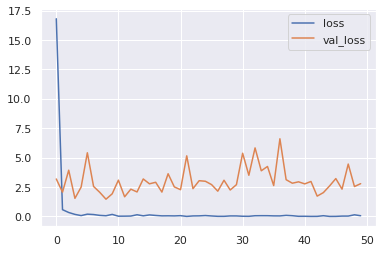

In [305]:
## Plot Train Vs Validation ##
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(historyRegressorModel.history['loss'], label='loss')
plt.plot(historyRegressorModel.history['val_loss'], label='val_loss')
plt.legend()

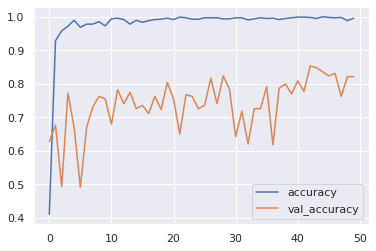

In [306]:
# Plot accuracy per iteration
plt.plot(historyRegressorModel.history['acc'], label='accuracy')
plt.plot(historyRegressorModel.history['val_acc'], label='val_accuracy')
plt.legend()

In [307]:
# Get the  model with the best score
# Lets  save both model and weights in appropriate file names

saved_model = load_model('best_model.h5')
model = saved_model
model.save('/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/CNN_TL_RESNT_IGNet.h5')
model.save_weights('/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/CNN_TL_RESNET_IGNet_weights.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [308]:
# Lets check if our model and weights are saved 
!ls

17flowers  best_model.h5  drive  sample_data


In [309]:
# Lets get the saved model
model = load_model('/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/CNN_TL_RESNT_IGNet.h5')

In [310]:
# Lets get the Train and Val Scores 
# Log results in Data Frame
(train_loss,train_acc)=model.evaluate(resnet_X_Train,Y_Train)
(val_loss,val_acc)=model.evaluate(resnet_X_Val,Y_Val)
# Capturing best results from above epoch
ResultsDF=ResultsDF.append({ 'Model_Type' :"CNN_TL_RESNET50",'Train_Acc':train_acc,'Val_Acc':val_acc,},ignore_index=True)
ResultsDF

,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922
1,NN,0.7741597,0.4681373
2,Logistic Regression,0.4065126,0.3235294
3,KNN,0.5619748,0.2965686
4,SVM,0.9201681,0.4534314
5,Random Forest,1.0000000,0.4460784
6,Ada Boost,0.1586134,0.1348039
7,Gradient Boost,1.0000000,0.3602941
8,CNN_TL_VGG16,1.0000000,0.8700981
9,CNN_TL_RESNET50,0.9926471,0.8529412


In [311]:
ResultsDF.to_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")

In [312]:
ResultsDF=pd.read_pickle("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/ResutDF.pkl")
ResultsDF

,Model_Type,Train_Acc,Val_Acc
0,CNN,0.7016807,0.6053922
1,NN,0.7741597,0.4681373
2,Logistic Regression,0.4065126,0.3235294
3,KNN,0.5619748,0.2965686
4,SVM,0.9201681,0.4534314
5,Random Forest,1.0000000,0.4460784
6,Ada Boost,0.1586134,0.1348039
7,Gradient Boost,1.0000000,0.3602941
8,CNN_TL_VGG16,1.0000000,0.8700981
9,CNN_TL_RESNET50,0.9926471,0.8529412


## 2.4 Compare Results


- As can be seen from the above results table , we have run the data with multiple algorithms                              
- CNN with transfer  learning using VGG16 Network on image net performed the best giving us 87% on Test Data                   
- All the Supervised Machine Learning algorithms performed poorly , they could not exceed .5 accuracy on Test although some of them overfit on training data                         
- ANN gave us an accuracy of .46 on test , this model can be tuned further to achieve higher results but will overfit .It has performed better than supervised ML algos
- CNN with transfer learning(in this case VGG16 gave us the best results) is bound to perform the best as the results show because it is tried and tested architecture and we have reused its weights to train our data

## 2.5 Best Performing Model & Prediction

In [320]:
## As mentioned above CNN with pretrained VGG16 model is the best performing model wit ~87% Validation data accuracy


# Lets get the saved model at below file location
# Lets retrieve the model
model = load_model('/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/SavedModels/CNN_TL_VGG16_IGNet.h5')


In [321]:
## Lets predict our Test Image provided to us using this model

import cv2
test_image = cv2.imread('/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part4_Project/Data/Prediction/Prediction - Flower.jpg')
## Lets predict our Test Image provided to us using this model


test_image = cv2.resize(test_image,(224,224))
# you dont have to resize because already in the shape

# Convert Image to RGB
test_image_convertedToRGB = cv2.cvtColor(test_image, cv2.COLOR_RGB2BGR)

# Check if the size of the Image array is compatible with Keras model
print(test_image_convertedToRGB.shape)

# If not compatible expand the dimensions to match with the Keras Input
test_image_convertedToRGB = np.expand_dims(test_image_convertedToRGB, axis = 0)
#We need to do this to make it 4D tensor for compatability , else it will be 3D tesor


(224, 224, 3)


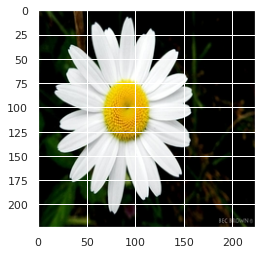

In [322]:
plt.imshow(test_image_convertedToRGB[0])

In [316]:
# Check pixel data
test_image_convertedToRGB
# Range is 0-255

In [323]:
# Preprocess image
from keras.applications.vgg16 import VGG16 ,preprocess_input
test_image_convertedToRGB=preprocess_input(test_image_convertedToRGB)
test_image_convertedToRGB.shape

(1, 224, 224, 3)

In [324]:
## Predict the result of the test image
result = model.predict(test_image_convertedToRGB)

In [325]:
result

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

Label predicted is 2 

Predicted Class for Test Image given is ***"2"***